In [340]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [341]:
def floyd_warshall(adj_matrix):
    n = len(adj_matrix)
    # 初期化: 隣接行列をそのまま使う（無限大は np.inf）
    dist = np.array(adj_matrix, dtype=float)

    dist[dist == 0] = np.inf  # 自己ループ以外の距離はinfにする
    np.fill_diagonal(dist, 0)  # 対角線（自己ループ）は0

    # フロイド・ワーシャル法で最短経路を計算
    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist

In [342]:
def p_centered_diam(dist, vertex_weights, i, p):
    # 頂点iを中心とした重みの和が1-p以上となる最小半径dを求める

    n = len(dist)  # 頂点の数
    visited = [False] * n  # 訪れた頂点を記録するリスト
    weight_sum = vertex_weights[i]  # 最初はiの重みだけ
    d = 0  # 最初の距離は0

    # 重みの和が1-p以上になれば終了
    if weight_sum >= 1 - p:
        return d

    # iからの距離がd以下の頂点を探して、重みの和を更新していく
    visited[i] = True  # iはすでに訪れた
    while True:
        # 距離d以下の頂点の中で、まだ訪れていない頂点をすべてリストに集める
        candidates = []
        for j in range(n):
            if not visited[j] and dist[i][j] <= d:
                candidates.append(j)

        # 次に訪れるべき頂点を更新し、重みの和を加算
        for j in candidates:
            visited[j] = True
            weight_sum += vertex_weights[j]

        # 重みの和が1-p以上になれば終了
        if weight_sum >= 1 - p:
            return d

        # 次のdを、まだ訪れていない頂点の中で、最小の距離に更新
        min_dist = np.inf
        for j in range(n):
            if not visited[j] and dist[i][j] < min_dist:
                min_dist = dist[i][j]

        # 最小距離が更新されなければ終了
        if min_dist == np.inf:
            break

        # dを更新
        d = min_dist

    return d

In [343]:
def p_observable_diameter(dist, vertex_weights, p):
    # 全ての頂点に対してp_centered_diamを計算し、その最大値を返す

    n = len(dist)  # 頂点の数
    p_ovservable_diameter = -np.inf  # 初期化

    for i in range(n):
        # 各頂点iに対してp_centered_diamを計算
        diameter = p_centered_diam(dist, vertex_weights, i, p)

        # 最大値を更新
        if diameter > p_ovservable_diameter:
           p_ovservable_diameter = diameter

    return p_ovservable_diameter

In [344]:
def max_p_and_p_observable_diameter(dist, vertex_weights):
    # p = 0, 1/20, 2/20, ..., 1 の間で p_observable_diameter と p の最大値を求める
    p_values = np.linspace(0, 1, 21)  # p = 0, 1/20, ..., 1と離散化
    results = []

    for p in p_values:
        observable_diameter = p_observable_diameter(dist, vertex_weights, p)
        results.append(max(observable_diameter, p))

    return p_values, results

In [345]:
def observable_diameter(dist, vertex_weights):
    p_values, results = max_p_and_p_observable_diameter(dist, vertex_weights)

    # pに関する最小値を求める
    min_value = min(results)
    min_index = results.index(min_value)
    min_p = p_values[min_index]

    return min_p, min_value

1.0

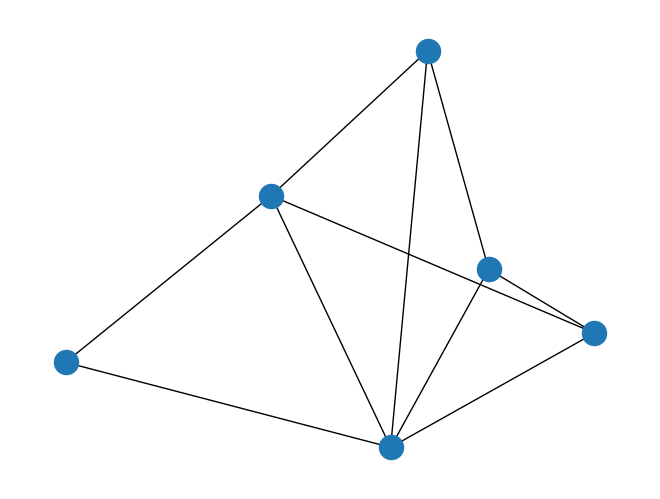

In [346]:
#構造の設定
adj_matrix = np.array([[0,10,0,10,0,10],[10,0,1,1,1,1],[0,1,0,2,3,4],[10,1,2,0,0,0],[0,1,3,0,0,0],[10,1,4,0,0,0]])  # 隣接行列
vertex_weights = np.array([0.1, 0.1, 0.2, 0.2, 0.1, 0.3])  # 頂点重みベクトル

G = nx.Graph(adj_matrix)
nx.draw(G),
vertex_weights.sum()

In [347]:
# 隣接行列から距離行列を計算
dist = floyd_warshall(adj_matrix)
dist

array([[ 0., 10., 11., 10., 11., 10.],
       [10.,  0.,  1.,  1.,  1.,  1.],
       [11.,  1.,  0.,  2.,  2.,  2.],
       [10.,  1.,  2.,  0.,  2.,  2.],
       [11.,  1.,  2.,  2.,  0.,  2.],
       [10.,  1.,  2.,  2.,  2.,  0.]])

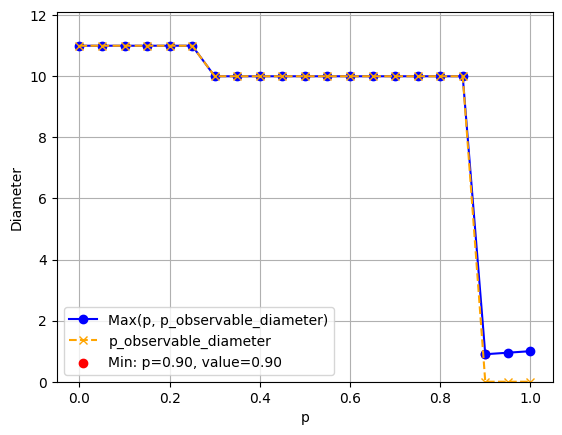

In [348]:
# max_p_and_p_observable_diameter を使って p に対する最大値を計算
p_values, results = max_p_and_p_observable_diameter(dist, vertex_weights)

# observable_diameter を使って最小値と対応するpを取得
min_p, min_value = observable_diameter(dist, vertex_weights)

# p_observable_diameter の結果を計算
observable_diameters = [p_observable_diameter(dist, vertex_weights, p) for p in p_values]

# プロット
plt.plot(p_values, results, marker='o', linestyle='-', color='b', label="Max(p, p_observable_diameter)")
plt.plot(p_values, observable_diameters, marker='x', linestyle='--', color='orange', label="p_observable_diameter")

# タイトルと軸ラベル
plt.xlabel("p")
plt.ylabel("Diameter")
plt.grid(True)

# 最小値に対応するpの位置に印をつける
plt.scatter(min_p, min_value, color='red', label=f"Min: p={min_p:.2f}, value={min_value:.2f}")

# 凡例の表示
plt.legend()

# y軸の範囲を0から最大値に設定（y軸が0を含むように）
plt.ylim(0, max(results) * 1.1)

# プロットを表示
plt.show()